## Testinge de la Red

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as opt
from torch import nn as nn
from Custom_models import REDCN1

##Carga de los entrnamientos y el set de prueba

In [2]:
model = REDCN1()
criterion = nn.CrossEntropyLoss()
optimizer = opt.SGD(model.parameters(), lr=0.001, momentum=0.9)


PATH = "./trained_model/RED_entrenada.pth"
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
epoch = checkpoint["epoch"]
loss = checkpoint["loss"]
graphic1 = checkpoint["loss_epoch"]
graphic2 = checkpoint["loss_epoch_validation"]

PATH2 = "./DATA/DATA.pth"
dataloader = torch.load(PATH2)
test_loader = dataloader["test_dataloader"]
classes = dataloader["classes"]

model.eval()
model.train()

REDCN1(
  (relu_conv): Sequential(
    (0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(20, 30, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(30, 40, kernel_size=(5, 5), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
  )
  (relu_linear): Sequential(
    (0): Linear(in_features=360, out_features=700, bias=True)
    (1): SELU()
    (2): Linear(in_features=700, out_features=300, bias=True)
    (3): SELU()
    (4): Linear(in_features=300, out_features=150, bias=True)
    (5): SELU()
    (6): Linear(in_features=150, out_features=80, bias=True)
    (7): SELU()
    (8): Linear(in_features=80, out_features=20, bias=True)
  )
)

##Funcion de perdida

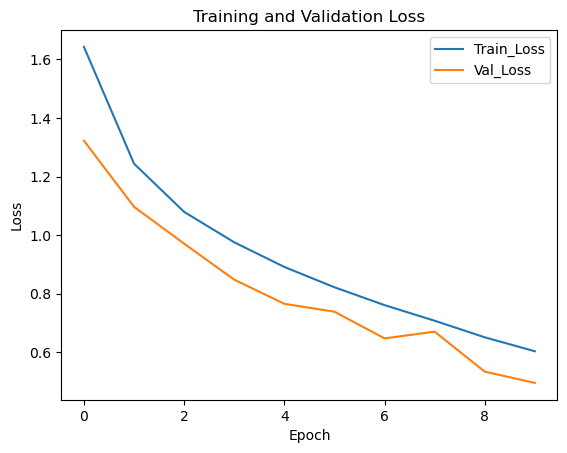

In [3]:
plt.plot(graphic1, label="Train_Loss")
plt.plot(graphic2, label="Val_Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## Precision de la Red global y por clases

In [3]:
test_loss = 0
class_correct = list(0.0 for i in range(100))
class_total = list(0.0 for i in range(100))
model.eval()  # test the model with dropout layers off
for images, labels in test_loader:
    output = model(images)
    loss = criterion(output, labels)
    test_loss += loss.item()
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(labels.data.view_as(pred)))
    for idx in range(5):
        label = labels[idx]
        class_correct[label] += correct[idx].item()
        class_total[label] += 1

    test_loss = test_loss / len(test_loader)
    print(f"Test Loss: {test_loss}")
    print(
        f"Predicted per class : {class_correct}, Correctly perdicted : {sum(class_correct)}"
    )
    print(
        f" Predictions per class : {class_total}, Predictions to be made : {sum(class_total)}\n"
    )
    for i in range(10):
        if class_total[i] > 0:
            print(
                f"Test Accuracy of class {classes[i]} : {float(100 * class_correct[i] / class_total[i])}% where {int(np.sum(class_correct[i]))} of {int(np.sum(class_total[i]))} were predicted correctly"
            )
        else:
            print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

    print(
        f"\nTest Accuracy : {float(100. * np.sum(class_correct) / np.sum(class_total))}% where {int(np.sum(class_correct))} of {int(np.sum(class_total))} were predicted correctly"
    )

IndexError: Target 41 is out of bounds.

##Mapas de calor de la primera capa convolucional

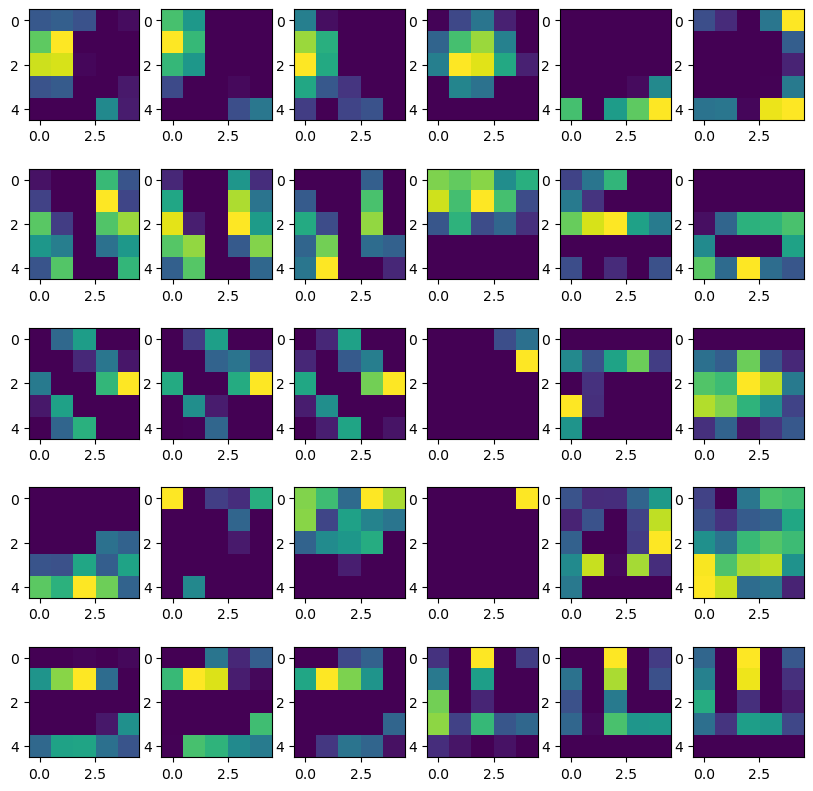

In [5]:
weight2 = []
for x in model.state_dict()["relu_conv.0.weight"]:
    for y in x:
        weight = y
        weight = weight / weight.max()
        weight = np.clip(weight, 0, 1)
        weight2.append(weight)


fig, axis = plt.subplots(nrows=5, ncols=6, figsize=(10, 10))


for ax, a in zip(axis.ravel(), range(30)):
    ax.imshow(weight2[a])

##Mapas de calor de la segunda capa convolucional

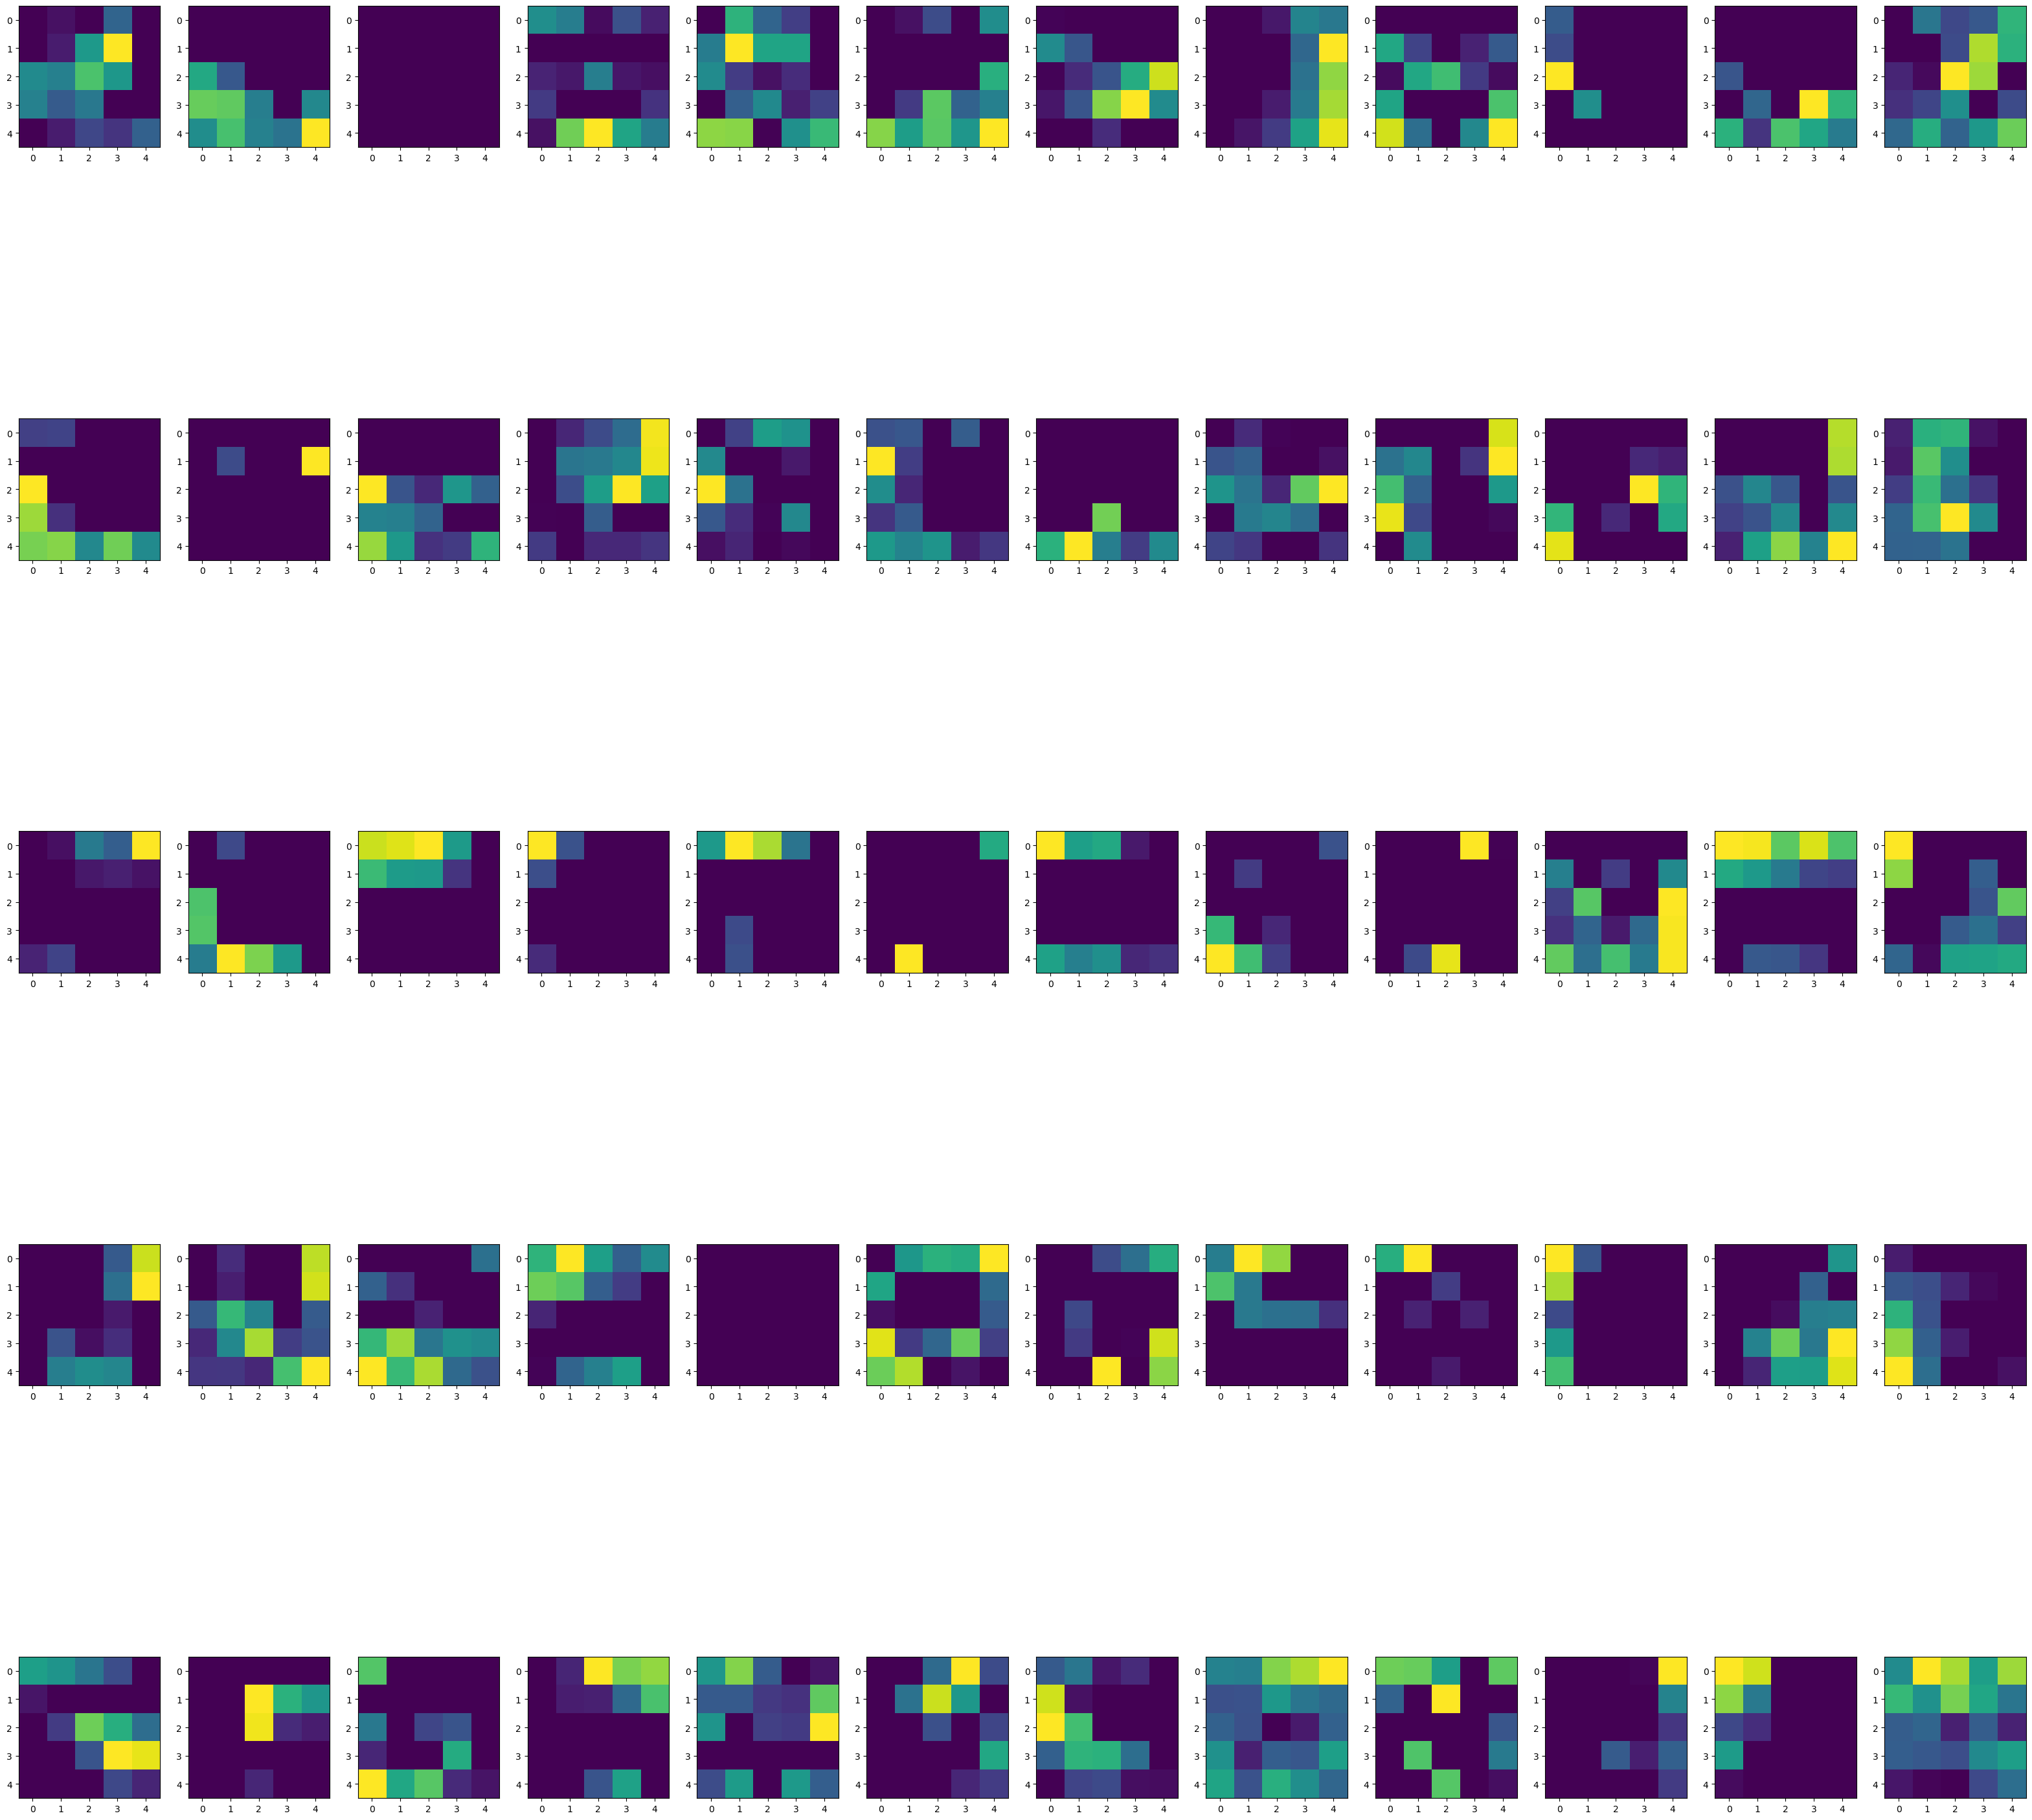

In [6]:
weight4 = []
for x in model.state_dict()["relu_conv.3.weight"]:
    for y in x:
        weight3 = y
        weight3 = weight3 / weight3.max()
        weight3 = np.clip(weight3, 0, 1)
        weight4.append(weight3)

fig, axis = plt.subplots(nrows=5, ncols=12, figsize=(40, 40))

for ax, a in zip(axis.ravel(), range(60)):
    ax.imshow(weight4[a])

##Mapas de calor de la Tercera capa convolucional

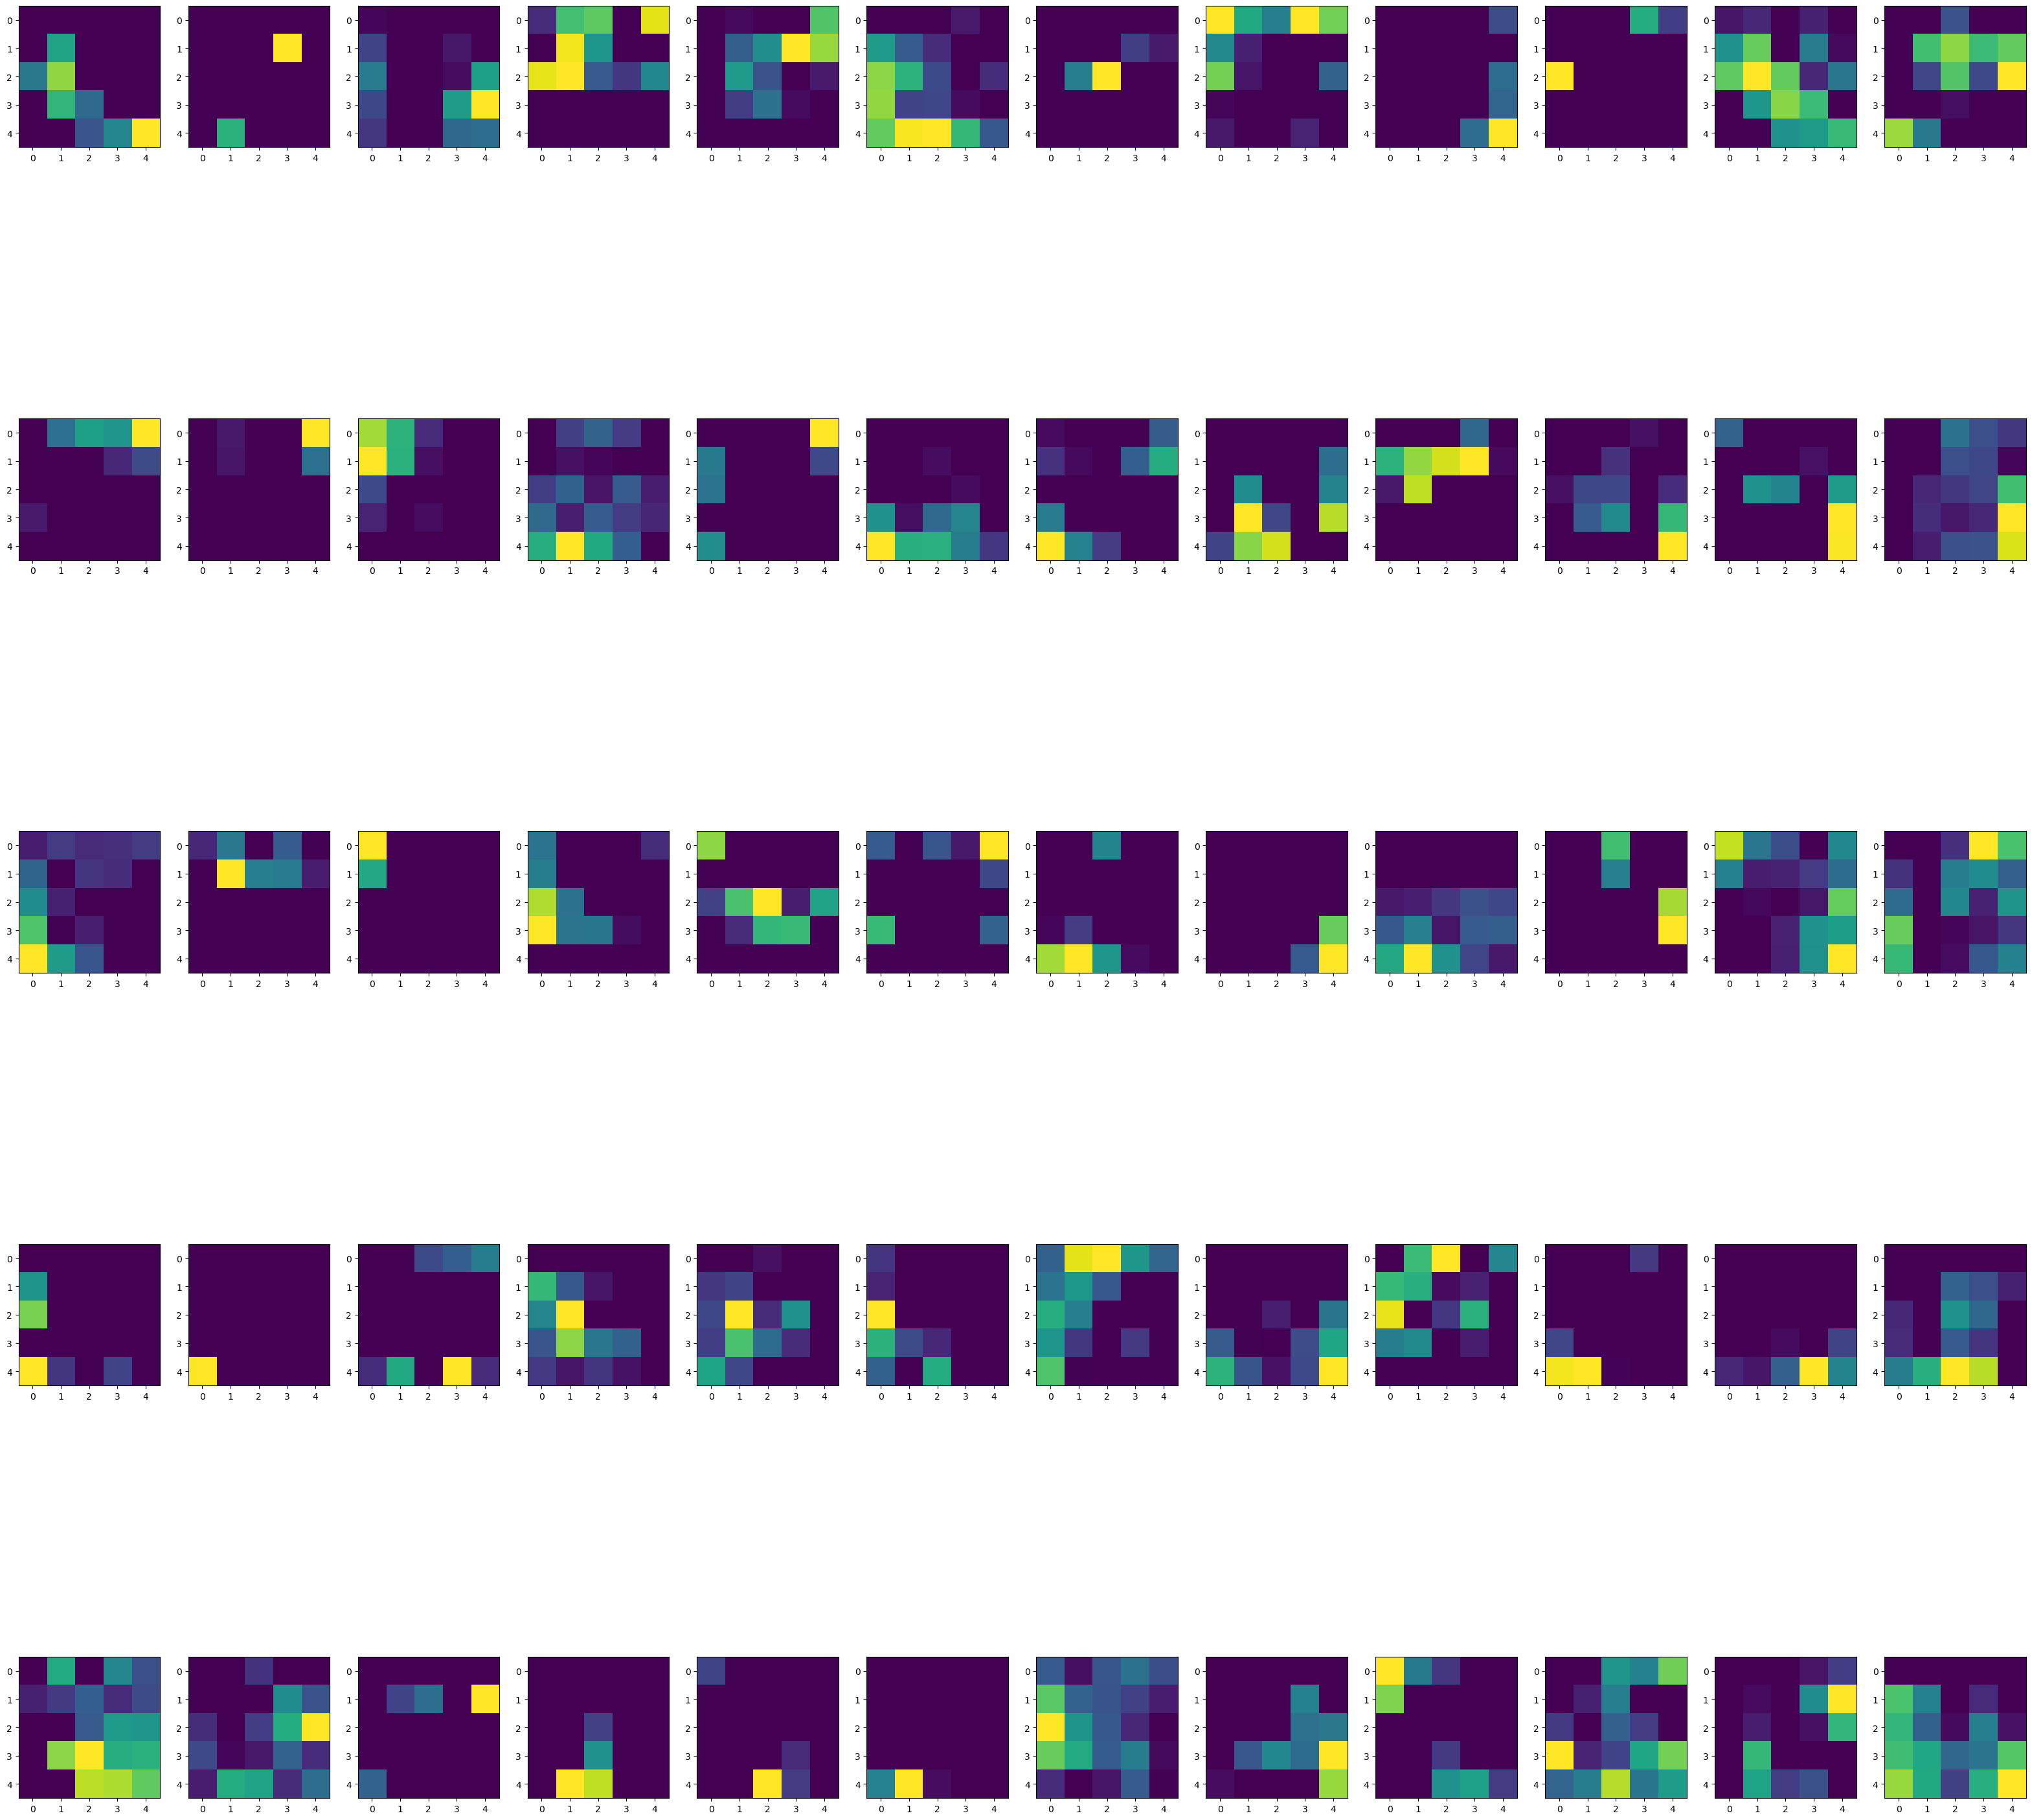

In [7]:
weight6 = []
for x in model.state_dict()["relu_conv.5.weight"]:
    for y in x:
        weight5 = y
        weight5 = weight5 / weight5.max()
        weight5 = np.clip(weight5, 0, 1)
        weight6.append(weight5)

fig, axis = plt.subplots(nrows=5, ncols=12, figsize=(40, 40))

for ax, a in zip(axis.ravel(), range(60)):
    ax.imshow(weight6[a])